# LAB-2 #1

### *E-Mail Classification using Naive Bayes*

<img height = 200 width = 200 src = 'https://cdn.dribbble.com/users/4874/screenshots/1776423/inboxiconanimation_30.gif'>

### Importing Libraries

In [1]:
import pandas as pd
from sklearn import preprocessing
import nltk 
nltk.download('stopwords')                 # download the stopwords from NLTK

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

from sklearn.naive_bayes import GaussianNB  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt            # library for visualization
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Getting our Data

In [2]:
df = pd.read_csv(r'../Dataset/email.csv', encoding='unicode_escape')
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


### Data Preprocessing

In [3]:
df = df.drop(['S. No.'], axis=1)  # dropping unnecesary column
label_encoder = preprocessing.LabelEncoder()  # label encoding for 'Label' column
df['Label'] = label_encoder.fit_transform(df['Label'])   # label encoding column - MSZoning for an example 
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
952,hows my favourite person today? r u workin har...,0
953,How much you got for cleaning,0
954,Sorry da. I gone mad so many pending works wha...,0
955,Wat time ü finish?,0


In [4]:
df.isnull().any()  # checking for null values if any

Message_body    False
Label           False
dtype: bool

### Performing steps in NLP

In [5]:
def process_mail(mail):
    """Process mail function.
    Input:
        mail: a string containing meassage body
    Output:
        mail_clean: a list of words containing the processed body

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # tokenize reviews
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    mail_tokens = tokenizer.tokenize(mail)

    mail_clean = []
    for word in mail_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # mail_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            mail_clean.append(stem_word)

    return mail_clean

In [6]:
# using the process_mail function for:
# 1. Removing stop words
# 2. Tokenization
# 3. Stemming
A = []
a = df['Message_body']
for i in a:
  i = process_mail(i)
  A.append(i)
df['Message_body'] = A
df

,Message_body,Label
0,"[rofl, true, name]",0
1,"[guy, bitch, act, like, i'd, interest, buy, so...",0
2,"[piti, mood, ..., suggest]",0
3,"[ü, b, go, esplanad, fr, home]",0
4,"[2nd, time, tri, 2, contact, u, u, £, 750, pou...",1
...,...,...
952,"[how, favourit, person, today, r, u, workin, h...",0
953,"[much, got, clean]",0
954,"[sorri, da, gone, mad, mani, pend, work]",0
955,"[wat, time, ü, finish]",0


### Vectorizing

In [7]:
cv = CountVectorizer(max_features=1500, analyzer='word', lowercase=False) 

In [8]:
df['Message_body'] = df['Message_body'].apply(lambda x: " ".join(x) )  # to join all words in the lists
X = cv.fit_transform(df['Message_body'])  # predictor variable 'X'

In [9]:
df

,Message_body,Label
0,rofl true name,0
1,guy bitch act like i'd interest buy someth els...,0
2,piti mood ... suggest,0
3,ü b go esplanad fr home,0
4,2nd time tri 2 contact u u £ 750 pound prize 2...,1
...,...,...
952,how favourit person today r u workin hard slee...,0
953,much got clean,0
954,sorri da gone mad mani pend work,0
955,wat time ü finish,0


In [10]:
y = pd.DataFrame(df['Label'])  # respose variable 'y'
y.head()

,Label
0,0
1,0
2,0
3,0
4,1


### Data Visualization

<AxesSubplot:xlabel='Label', ylabel='count'>

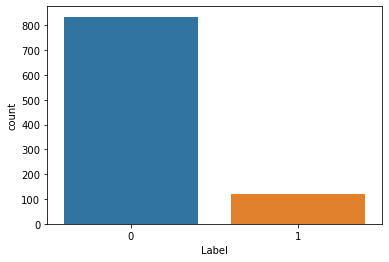

In [11]:
# checking the distribution of outcomes
sns.countplot(x = 'Label', data = df)

### Splitting for Training and Testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)  # splitting in the ratio 70:30

### Model

In [13]:
X_train = X_train.todense()

In [14]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

### Making Predictions

In [15]:
X_test = X_test.todense()

In [16]:
y_pred = classifier.predict(X_test)

### Checking Accuracy

In [17]:
roc_auc_score(y_test, y_pred)

0.8558309469734374

# Predictions are 85.58% accurate.

### Results' Visualization

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[230,  17],
       [  9,  32]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.8558309469734374')

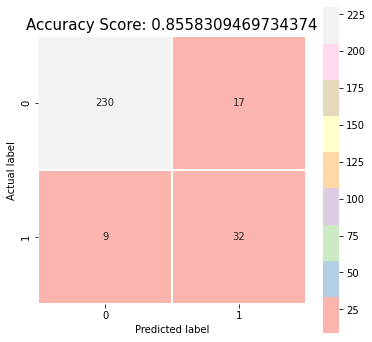

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(roc_auc_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)

### Classification Report

In [20]:
class_names = ['Non-Spam[0]','Spam[1]']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 Non-Spam[0]       0.96      0.93      0.95       247
     Spam[1]       0.65      0.78      0.71        41

    accuracy                           0.91       288
   macro avg       0.81      0.86      0.83       288
weighted avg       0.92      0.91      0.91       288

